In [31]:
# Import necessary libraries
import pandas as pd

In [32]:
# Load the dataset (replace 'path_to_your_data.csv' with your actual file path)
df = pd.read_csv('All_combined.csv')

# Check the first few rows and see the column names
print(df.head())
print(df.columns)

  Currency_Name        Date  Price  Open  High   Low       Vol.  Change %
0          Aave  2018-01-30   0.15  0.17  0.17  0.14   530470.0     -7.95
1          Aave  2018-01-31   0.14  0.15  0.15  0.13   396050.0    -11.10
2          Aave  2018-02-01   0.11  0.14  0.14  0.11   987260.0    -17.46
3          Aave  2018-02-02   0.10  0.11  0.11  0.08  1810000.0     -8.32
4          Aave  2018-02-03   0.11  0.10  0.12  0.09  1200000.0      6.85
Index(['Currency_Name', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.',
       'Change %'],
      dtype='object')


In [33]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if the date conversion was successful
print(df['Date'].head())

0   2018-01-30
1   2018-01-31
2   2018-02-01
3   2018-02-02
4   2018-02-03
Name: Date, dtype: datetime64[ns]


In [34]:
# Clean numeric columns by removing unwanted characters
cols_to_clean = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
for col in cols_to_clean:
    df[col] = df[col].astype(str) \
                     .str.replace(',', '', regex=False) \
                     .str.replace('%', '', regex=False) \
                     .str.replace('K', 'e3', regex=False) \
                     .str.replace('M', 'e6', regex=False) \
                     .str.replace('B', 'e9', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the cleaned data
print(df.head())


  Currency_Name       Date  Price  Open  High   Low       Vol.  Change %
0          Aave 2018-01-30   0.15  0.17  0.17  0.14   530470.0     -7.95
1          Aave 2018-01-31   0.14  0.15  0.15  0.13   396050.0    -11.10
2          Aave 2018-02-01   0.11  0.14  0.14  0.11   987260.0    -17.46
3          Aave 2018-02-02   0.10  0.11  0.11  0.08  1810000.0     -8.32
4          Aave 2018-02-03   0.11  0.10  0.12  0.09  1200000.0      6.85


In [35]:
# Drop rows with missing 'Date' or 'Price' values
df.dropna(subset=['Date', 'Price'], inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())


Currency_Name    0
Date             0
Price            0
Open             0
High             0
Low              0
Vol.             0
Change %         0
dtype: int64


In [36]:
# Check the first few rows of the cleaned data
print(df.head())

# Check the column types to verify the data is now numeric
print(df.dtypes)


  Currency_Name       Date  Price  Open  High   Low       Vol.  Change %
0          Aave 2018-01-30   0.15  0.17  0.17  0.14   530470.0     -7.95
1          Aave 2018-01-31   0.14  0.15  0.15  0.13   396050.0    -11.10
2          Aave 2018-02-01   0.11  0.14  0.14  0.11   987260.0    -17.46
3          Aave 2018-02-02   0.10  0.11  0.11  0.08  1810000.0     -8.32
4          Aave 2018-02-03   0.11  0.10  0.12  0.09  1200000.0      6.85
Currency_Name            object
Date             datetime64[ns]
Price                   float64
Open                    float64
High                    float64
Low                     float64
Vol.                    float64
Change %                float64
dtype: object


# Price Trend Analysis

Plot the Price Trend

In [38]:
!pip install seaborn


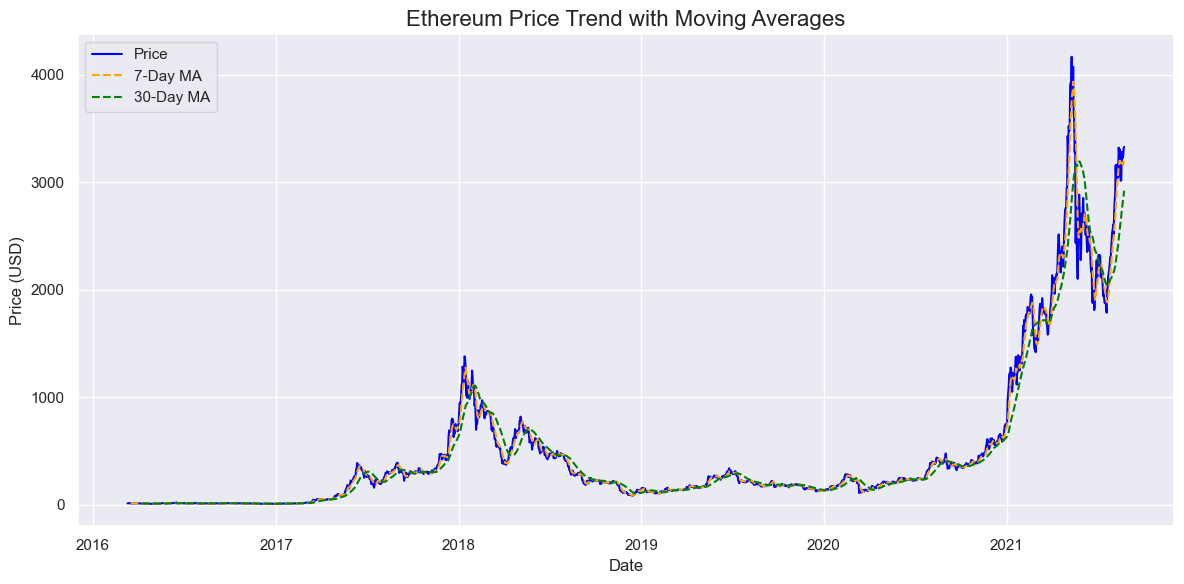

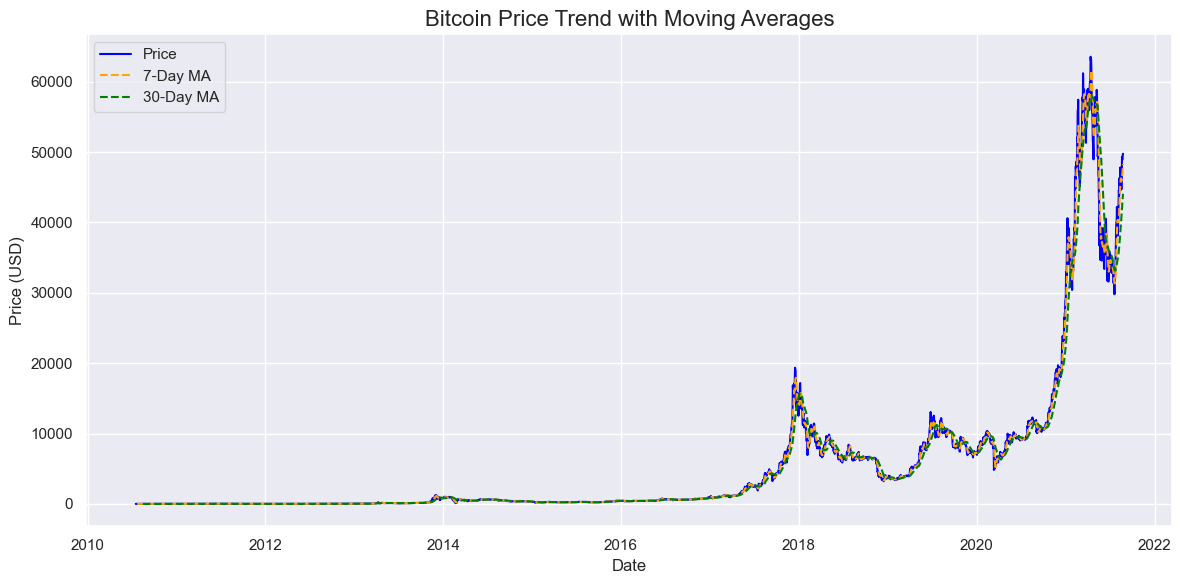

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# Function to plot the price trend of a cryptocurrency
def plot_price_trend(crypto_name):
    # Filter the data for the given cryptocurrency
    crypto_df = df[df['Currency_Name'] == crypto_name]

    # Check if the data for the cryptocurrency exists
    if crypto_df.empty:
        print(f"No data found for {crypto_name}")
        return

    # Plot the price trend
    plt.figure(figsize=(12, 6))
    plt.plot(crypto_df['Date'], crypto_df['Price'], label='Price', color='blue')

    # Plot the 7-day and 30-day moving averages
    plt.plot(crypto_df['Date'], crypto_df['Price'].rolling(window=7).mean(), label='7-Day MA', linestyle='--', color='orange')
    plt.plot(crypto_df['Date'], crypto_df['Price'].rolling(window=30).mean(), label='30-Day MA', linestyle='--', color='green')

    # Set title and labels
    plt.title(f'{crypto_name} Price Trend with Moving Averages', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Plotting the price trend for Bitcoin
plot_price_trend('Ethereum')  # For Ethereum
plot_price_trend('Bitcoin')   # For Bitcoin


C:\Users\poorn\AppData\Local\Temp\ipykernel_19912\1852678924.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_df['Volatility'] = crypto_df['Price'].rolling(window=30).std()
C:\Users\poorn\AppData\Local\Temp\ipykernel_19912\1852678924.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_df['Volatility'] = crypto_df['Price'].rolling(window=30).std()


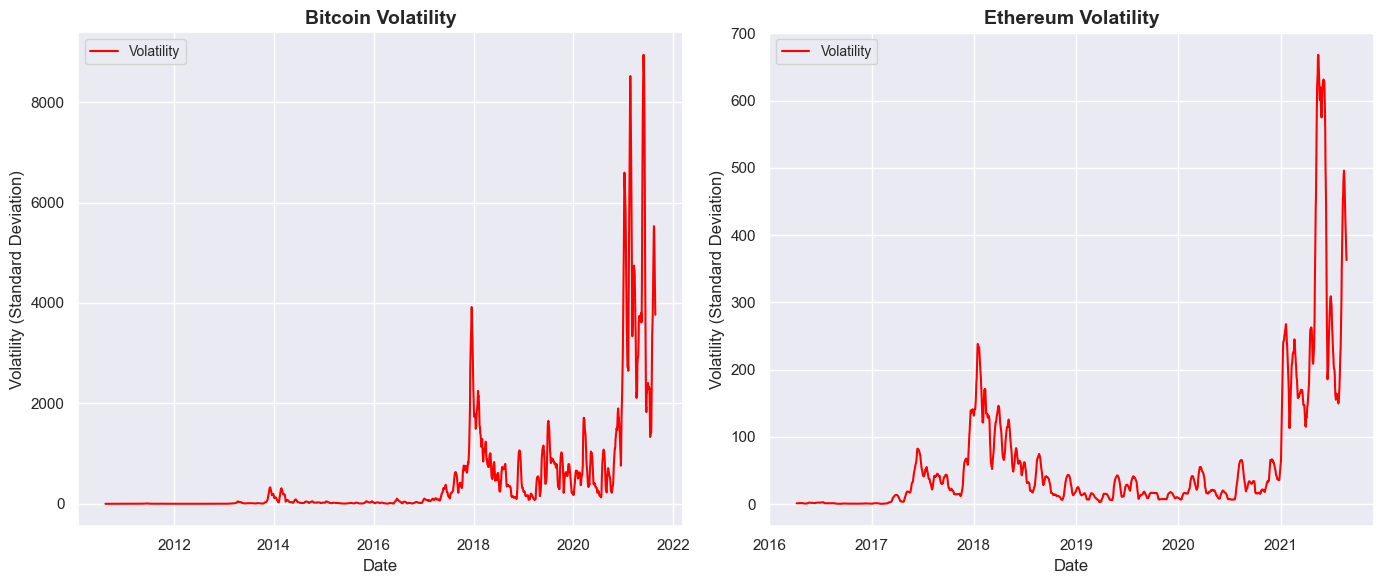

In [ ]:
import numpy as np

# Function to calculate and plot volatility (rolling standard deviation)
def plot_volatility():
    # List of top cryptocurrencies to analyze volatility (Bitcoin and Ethereum)
    top_cryptos = ['Bitcoin', 'Ethereum']

    # Create a figure for plotting volatility
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1x2 grid for two cryptos
    axes = axes.flatten()  # Flatten axes to make it easier to loop through

    for i, crypto_name in enumerate(top_cryptos):
        crypto_df = df[df['Currency_Name'] == crypto_name]

        # Check if the data for the cryptocurrency exists
        if crypto_df.empty:
            print(f"No data found for {crypto_name}")
            axes[i].set_title(f'{crypto_name} - No Data', fontsize=14, fontweight='bold')
            continue

        # Calculate rolling standard deviation (volatility) with a 30-day window
        crypto_df['Volatility'] = crypto_df['Price'].rolling(window=30).std()

        # Plot the volatility
        axes[i].plot(crypto_df['Date'], crypto_df['Volatility'], label='Volatility', color='red', linewidth=1.5)

        # Set title and labels for each subplot
        axes[i].set_title(f'{crypto_name} Volatility', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Volatility (Standard Deviation)')
        axes[i].legend(loc='best', fontsize=10)

    # Adjust layout to prevent overlap of titles/labels
    plt.tight_layout()
    plt.show()

# Plotting the volatility for Bitcoin and Ethereum
plot_volatility()


In [ ]:
!pip install statsmodels



ARIMA Forecasting for Bitcoin and Ethereum

C:\Users\poorn\AppData\Local\Temp\ipykernel_19912\3790120203.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_df['Price'] = crypto_df['Price'].fillna(method='ffill')  # Forward fill missing values


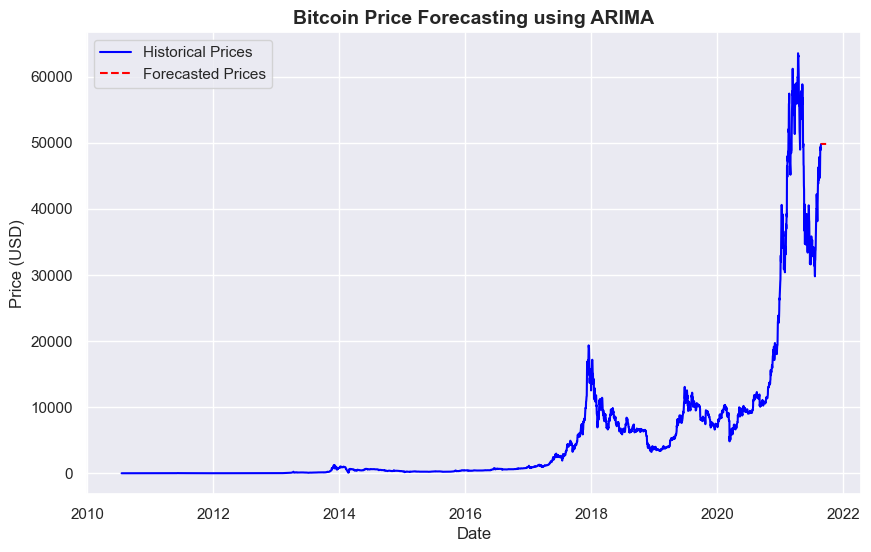

C:\Users\poorn\AppData\Local\Temp\ipykernel_19912\3790120203.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_df['Price'] = crypto_df['Price'].fillna(method='ffill')  # Forward fill missing values


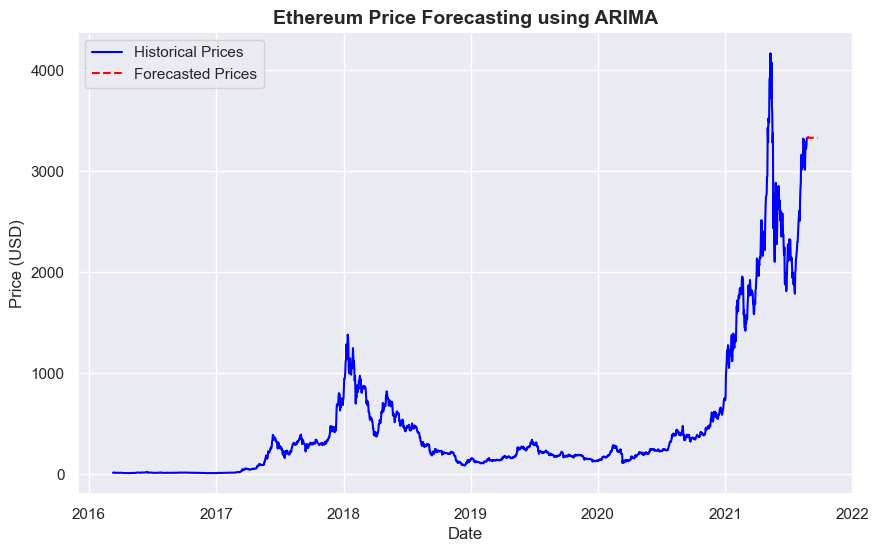

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Function to forecast using ARIMA model
def arima_forecast(crypto_name, steps=30):
    # Filter the dataframe for the selected cryptocurrency
    crypto_df = df[df['Currency_Name'] == crypto_name]

    # Check if the data exists
    if crypto_df.empty:
        print(f"No data found for {crypto_name}")
        return

    # Use only the 'Price' for ARIMA model
    crypto_df = crypto_df[['Date', 'Price']].set_index('Date')
    crypto_df = crypto_df.asfreq('D')  # Ensure daily frequency for the time series
    crypto_df['Price'] = crypto_df['Price'].fillna(method='ffill')  # Forward fill missing values

    # Train ARIMA model (use p=5, d=1, q=0 as an example)
    model = ARIMA(crypto_df['Price'], order=(5, 1, 0))  # Adjust p, d, q values as necessary
    model_fit = model.fit()

    # Forecast the next 30 days
    forecast = model_fit.forecast(steps=steps)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(crypto_df.index, crypto_df['Price'], label='Historical Prices', color='blue')
    plt.plot(pd.date_range(crypto_df.index[-1], periods=steps + 1, freq='D')[1:], forecast, label='Forecasted Prices', color='red', linestyle='--')
    plt.title(f'{crypto_name} Price Forecasting using ARIMA', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Forecast Bitcoin using ARIMA for the next 30 days
arima_forecast('Bitcoin', steps=30)

# Forecast Ethereum using ARIMA for the next 30 days
arima_forecast('Ethereum', steps=30)

LSTM Forecasting

Data Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Function to create a dataset of sequences and corresponding labels
def create_dataset(crypto_name, look_back=60):
    # Filter the dataframe for the selected cryptocurrency
    crypto_df = df[df['Currency_Name'] == crypto_name]

    # Ensure data exists
    if crypto_df.empty:
        print(f"No data found for {crypto_name}")
        return None, None

    # Use only the 'Price' for LSTM model
    crypto_df = crypto_df[['Date', 'Price']].set_index('Date')
    crypto_df = crypto_df.asfreq('D')  # Ensure daily frequency for the time series
    crypto_df['Price'] = crypto_df['Price'].fillna(method='ffill')  # Forward fill missing values

    # Normalize the prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(crypto_df['Price'].values.reshape(-1, 1))

    # Create sequences of 'look_back' days for predicting the next day's price
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)

    # Reshape X to be 3D for LSTM input
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler

# Example: Create dataset for Bitcoin
X_train, X_test, y_train, y_test, scaler = create_dataset('Bitcoin', look_back=60)

C:\Users\poorn\AppData\Local\Temp\ipykernel_19912\3510620942.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_df['Price'] = crypto_df['Price'].fillna(method='ffill')  # Forward fill missing values


Build the LSTM Model

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Sample data (replace with your real dataset)
data = np.sin(np.linspace(0, 100, 1000))  # Dummy time-series data

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

# Reshape input for LSTM: (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lstm_model = build_lstm_model((X_train.shape[1], 1))
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
24/24 [==============================] - 11s 142ms/step - loss: 0.1075 - val_loss: 0.0338
Epoch 2/10
24/24 [==============================] - 2s 67ms/step - loss: 0.0160 - val_loss: 0.0013
Epoch 3/10
24/24 [==============================] - 3s 117ms/step - loss: 0.0056 - val_loss: 6.1782e-04
Epoch 4/10
24/24 [==============================] - 2s 85ms/step - loss: 0.0049 - val_loss: 7.0894e-04
Epoch 5/10
24/24 [==============================] - 2s 75ms/step - loss: 0.0044 - val_loss: 2.2616e-04
Epoch 6/10
24/24 [==============================] - 2s 74ms/step - loss: 0.0040 - val_loss: 5.9367e-04
Epoch 7/10
24/24 [==============================] - 2s 85ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 8/10
24/24 [==============================] - 2s 70ms/step - loss: 0.0041 - val_loss: 2.6718e-04
Epoch 9/10
24/24 [==============================] - 2s 83ms/step - loss: 0.0031 - val_loss: 5.9897e-04
Epoch 10/10
24/24 [==============================] - 2s 80ms/step - loss: 0.0039 -

Forecasting and Plotting Results

In [ ]:
# Function to make predictions and plot the results
def plot_lstm_forecast(crypto_name, look_back=60, steps=30):
    X_train, X_test, y_train, y_test, scaler = create_dataset(crypto_name, look_back)

    # Make predictions
    predicted_price = lstm_model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)  # Rescale back to original prices

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df[df['Currency_Name'] == crypto_name]['Date'][-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Prices', color='blue')
    plt.plot(df[df['Currency_Name'] == crypto_name]['Date'][-len(y_test):], predicted_price, label='Predicted Prices', color='red', linestyle='--')
    plt.title(f'{crypto_name} Price Forecasting using LSTM', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Forecast Bitcoin using LSTM
plot_lstm_forecast('Bitcoin', look_back=60, steps=30)

# Forecast Ethereum using LSTM
plot_lstm_forecast('Ethereum', look_back=60, steps=30)

In [ ]:
!pip install matplotlib


In [ ]:
!pip install pandas


File 'cleaned_crypto_data.csv' not found. Generating the file...
The variable 'df' is not defined. Attempting to load from other cells...
Loaded 'raw_crypto_data_with_arima_anomalies.csv' as 'df'.


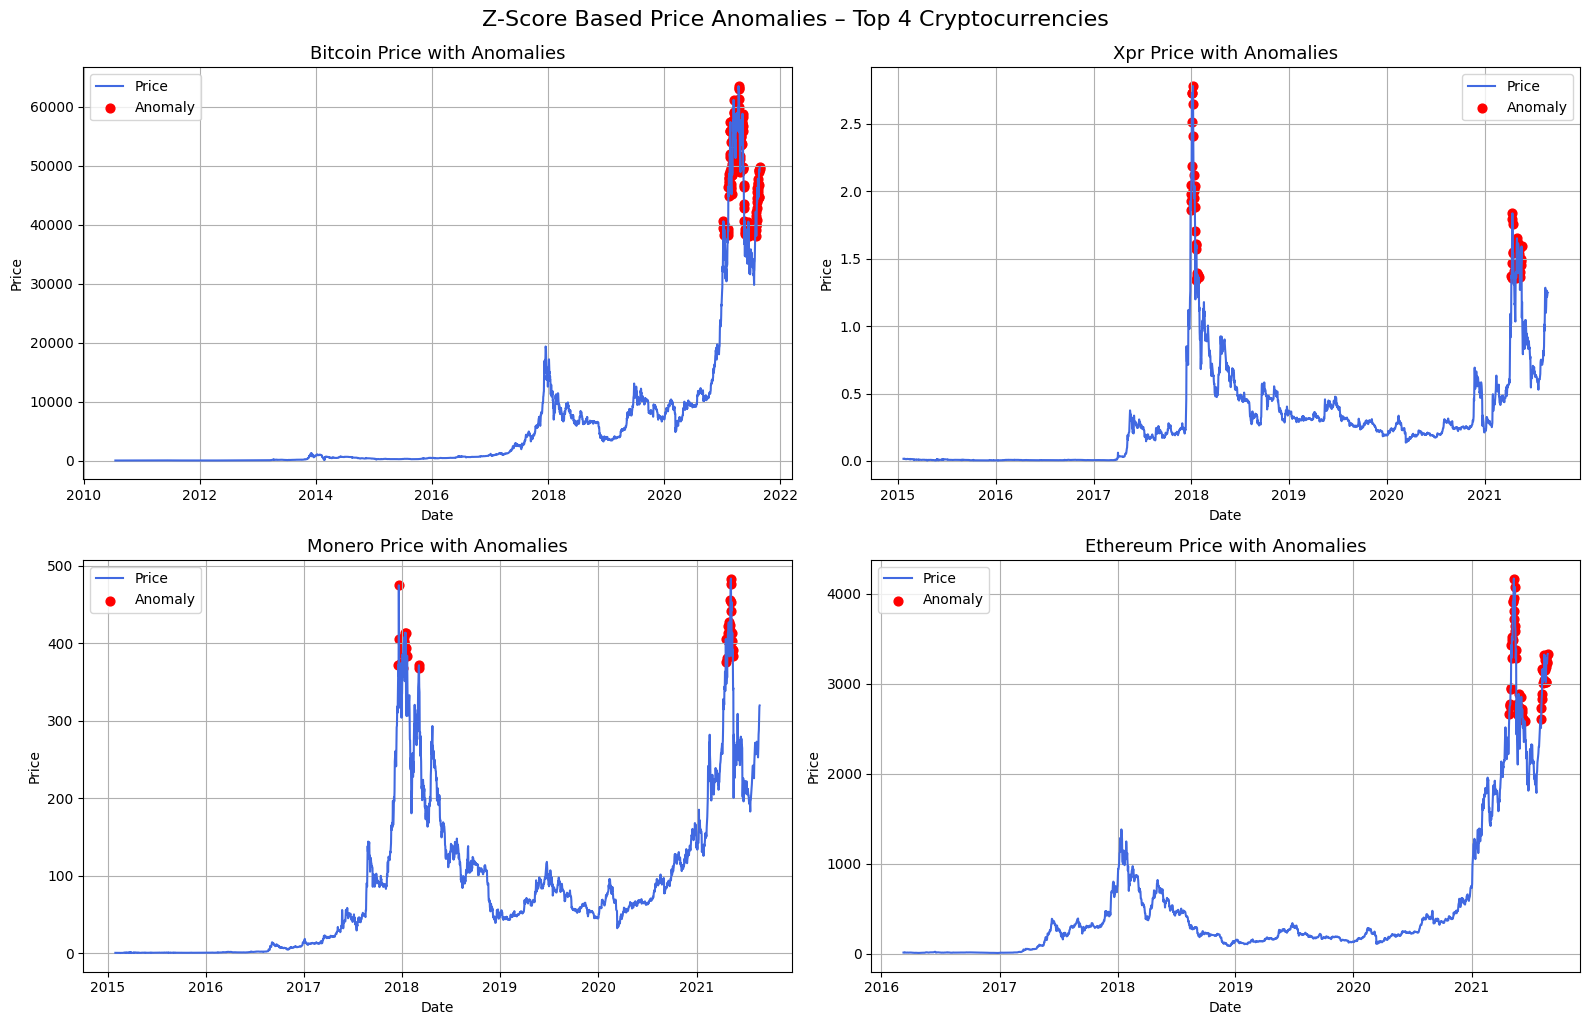

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

# Check if the file exists, if not, create it
if not os.path.exists('cleaned_crypto_data.csv'):
    print("File 'cleaned_crypto_data.csv' not found. Generating the file...")
    try:
        df.to_csv('cleaned_crypto_data.csv', index=False)
    except NameError:
        print("The variable 'df' is not defined. Attempting to load from other cells...")
        # Attempt to load the dataset from previously defined cells
        try:
            df = pd.read_csv('raw_crypto_data_with_arima_anomalies.csv')
            print("Loaded 'raw_crypto_data_with_arima_anomalies.csv' as 'df'.")
            df.to_csv('cleaned_crypto_data.csv', index=False)
        except FileNotFoundError:
            raise FileNotFoundError("Neither 'cleaned_crypto_data.csv' nor 'raw_crypto_data_with_arima_anomalies.csv' exists. Please ensure the dataset is available.")

# Load the dataset
if 'df' not in globals():
    df = pd.read_csv('cleaned_crypto_data.csv')

# Get top 4 cryptos with the most data
top_4 = df['Currency_Name'].value_counts().head(4).index.tolist()

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

for i, crypto in enumerate(top_4):
    temp = df[df['Currency_Name'] == crypto].copy()
    temp['Date'] = pd.to_datetime(temp['Date'])
    temp.sort_values('Date', inplace=True)

    # Z-score
    mean = temp['Price'].mean()
    std = temp['Price'].std()
    temp['z_score'] = (temp['Price'] - mean) / std
    temp['Anomaly'] = temp['z_score'].abs() > 3

    # Plot
    axs[i].plot(temp['Date'], temp['Price'], label='Price', color='royalblue')
    axs[i].scatter(temp[temp['Anomaly']]['Date'], temp[temp['Anomaly']]['Price'],
                   color='red', label='Anomaly', s=40)
    axs[i].set_title(f'{crypto} Price with Anomalies', fontsize=13)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.suptitle("Z-Score Based Price Anomalies – Top 4 Cryptocurrencies", fontsize=16, y=1.02)
plt.show()



In [ ]:
df.to_csv('cleaned_crypto_data.csv', index=False)

In [ ]:
df = pd.read_csv('cleaned_crypto_data.csv')

In [ ]:
!pip install statsmodels


In [ ]:
import pandas as pd
from scipy.stats import zscore
from statsmodels.tsa.arima.model import ARIMA

# 1. Load your full cleaned dataset (no filtering by top 3 cryptos)
df = pd.read_csv('cleaned_crypto_data.csv')

# 2. Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 3. Remove any leading/trailing spaces and make sure crypto names are formatted consistently
df['Currency_Name'] = df['Currency_Name'].str.strip()
df['Currency_Name'] = df['Currency_Name'].str.title()

# 4. Sort by Currency & Date (important for time series analysis)
df = df.sort_values(by=['Currency_Name', 'Date'])

# ----------------------------
# 5. Z-SCORE ANOMALY DETECTION
# ----------------------------
def compute_zscore(group):
    # Calculate z-score for the 'Price' column
    group['z_score'] = zscore(group['Price'], nan_policy='omit')
    # Flag as anomaly if z-score is greater than 3 or less than -3
    group['Anomaly'] = group['z_score'].apply(lambda x: 'Yes' if abs(x) > 3 else 'No')
    return group

# Apply the z-score calculation and anomaly detection by each crypto
df = df.groupby('Currency_Name', group_keys=False).apply(compute_zscore).reset_index(drop=True)

# ----------------------------
# 6. ARIMA FORECASTING (For each cryptocurrency)
# ----------------------------
def apply_arima_forecast(group):
    group = group.set_index('Date')
    # Fit ARIMA model on the 'Price' column
    model = ARIMA(group['Price'], order=(5,1,0))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast the next 30 days for each cryptocurrency
    forecast = model_fit.forecast(steps=30)

    # Create a DataFrame for the forecasted values
    future_dates = pd.date_range(start=group.index.max() + pd.Timedelta(days=1), periods=30)
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Currency_Name': group['Currency_Name'].iloc[0],  # Use the currency name
        'ARIMA_Prediction': forecast
    })

    return forecast_df

# Apply ARIMA forecast to each cryptocurrency group and merge with original data
forecasted_data = df.groupby('Currency_Name').apply(apply_arima_forecast).reset_index(drop=True)

# Merge the forecasted values with the original data
df = pd.merge(df, forecasted_data[['Currency_Name', 'Date', 'ARIMA_Prediction']],
              on=['Currency_Name', 'Date'], how='left')

# ----------------------------
# 7. EXPORT FINAL DATA TO CSV (for Power BI)
# ----------------------------
df.to_csv('raw_crypto_data_with_arima_anomalies.csv', index=False)
print("✅ Exported 'raw_crypto_data_with_arima_anomalies.csv' successfully!")


C:\Users\poorn\AppData\Local\Temp\ipykernel_17240\1597566547.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Currency_Name', group_keys=False).apply(compute_zscore).reset_index(drop=True)
e:\crypto.ipynb\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\crypto.ipynb\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

✅ Exported 'raw_crypto_data_with_arima_anomalies.csv' successfully!


In [ ]:
# Save only forecasted values to a separate CSV
forecasted_data.to_csv('forecasted_crypto_prices.csv', index=False)
print("✅ Exported 30-day forecasts to 'forecasted_crypto_prices.csv' successfully!")

✅ Exported 30-day forecasts to 'forecasted_crypto_prices.csv' successfully!
